# Covid-19: Comparing cases and lockdowns in Berlin and Zurich
## Table of Content
<ol>
<li><a href="#gathering">Data gathering</a></li>
<li><a href="#assessment">Data Assessment</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#analysis">Analysis, Modeling and Visualisation</a></li>
</ol>

## 1. Data Gathering <a id='gathering'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import csv files
cases_de = pd.read_csv('covid_cases_de.csv')
cases_zh_raw = pd.read_csv('covid_cases_zh.csv')
vacc_global = pd.read_csv('covid_vaccinations_global.csv')
lockdowns = pd.read_csv('lockdowns.csv', sep = ';')
temperature_be = pd.read_csv('temperature_be.csv')
temperature_zh = pd.read_csv('temperature_zh.csv', sep = ';')

## 2. Data Assessment <a id='assessment'></a>

### Berlin cases

In [3]:
cases_de[cases_de.state == 'Berlin'].head()

,state,county,age_group,gender,date,cases,deaths,recovered
293445,Berlin,SK Berlin Charlottenburg-Wilmersdorf,00-04,F,2020-03-31,1,0,1
293446,Berlin,SK Berlin Charlottenburg-Wilmersdorf,00-04,F,2020-04-07,1,0,1
293447,Berlin,SK Berlin Charlottenburg-Wilmersdorf,00-04,F,2020-04-10,1,0,1
293448,Berlin,SK Berlin Charlottenburg-Wilmersdorf,00-04,F,2020-05-12,1,0,1
293449,Berlin,SK Berlin Charlottenburg-Wilmersdorf,00-04,F,2020-07-20,1,0,1


In [4]:
cases_de[cases_de.state == 'Berlin'].tail()

,state,county,age_group,gender,date,cases,deaths,recovered
325606,Berlin,SK Berlin Treptow-Koepenick,NaN,M,2021-01-08,1,0,1
325607,Berlin,SK Berlin Treptow-Koepenick,NaN,M,2021-01-14,1,0,1
325608,Berlin,SK Berlin Treptow-Koepenick,NaN,M,2021-04-13,1,0,1
325609,Berlin,SK Berlin Treptow-Koepenick,NaN,NaN,2021-03-15,1,0,1
325610,Berlin,SK Berlin Treptow-Koepenick,NaN,NaN,2021-03-17,1,0,1


In [5]:
# check for misisng values
cases_de[cases_de.state == 'Berlin'].isnull().any()

state        False
county       False
age_group     True
gender        True
date         False
cases        False
deaths       False
recovered    False
dtype: bool

In [6]:
# check data types
cases_de[cases_de.state == 'Berlin'].dtypes

state        object
county       object
age_group    object
gender       object
date         object
cases         int64
deaths        int64
recovered     int64
dtype: object

In [7]:
cases_de[cases_de.state == 'Berlin'].describe()

,cases,deaths,recovered
count,32166.000000,32166.000000,32166.000000
mean,5.550022,0.108717,5.367966
std,6.809680,0.454311,6.805263
min,1.000000,0.000000,-1.000000
25%,1.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000
75%,7.000000,0.000000,7.000000
max,76.000000,16.000000,76.000000


#### Issues <a id='berlin_issues'></a>
1. Data frame needs to be filtered for Berlin data
2. Data needs to be added up within county, age and gender groups for each day
3. Only keep columns `date` and `cases`
4. Date column needs to be changed to date type
5. Unclear if there is data for each day
6. 7-day incidence needs to be calculated
7. Date range needs to be aligned with other data frames (necessary for planned regression model)

### Zurich cases

In [8]:
cases_zh_raw.head()

,date,time,abbreviation_canton_and_fl,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,source,current_isolated,current_quarantined,current_quarantined_riskareatravel,current_quarantined_total
0,2020-02-27,14:30,ZH,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,https://www.zh.ch/de/gesundheit/coronavirus.html,NaN,NaN,NaN,NaN
1,2020-02-28,14:30,ZH,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,https://www.zh.ch/de/gesundheit/coronavirus.html,NaN,NaN,NaN,NaN
2,2020-02-29,14:30,ZH,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,https://www.zh.ch/de/gesundheit/coronavirus.html,NaN,NaN,NaN,NaN
3,2020-03-01,14:30,ZH,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,https://www.zh.ch/de/gesundheit/coronavirus.html,NaN,NaN,NaN,NaN
4,2020-03-02,14:30,ZH,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,https://www.zh.ch/de/gesundheit/coronavirus.html,NaN,NaN,NaN,NaN


In [9]:
cases_zh_raw.tail()

,date,time,abbreviation_canton_and_fl,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,source,current_isolated,current_quarantined,current_quarantined_riskareatravel,current_quarantined_total
463,2021-06-04,14:30,ZH,NaN,111817,NaN,79.0,33.0,27.0,NaN,1405.0,https://www.zh.ch/de/gesundheit/coronavirus.html,699.0,1758.0,NaN,NaN
464,2021-06-05,14:30,ZH,NaN,111873,NaN,77.0,35.0,26.0,NaN,1405.0,https://www.zh.ch/de/gesundheit/coronavirus.html,NaN,NaN,NaN,NaN
465,2021-06-06,14:30,ZH,NaN,111911,NaN,77.0,35.0,25.0,NaN,1405.0,https://www.zh.ch/de/gesundheit/coronavirus.html,NaN,NaN,NaN,NaN
466,2021-06-07,14:30,ZH,NaN,111941,NaN,84.0,33.0,21.0,NaN,1405.0,https://www.zh.ch/de/gesundheit/coronavirus.html,699.0,1758.0,NaN,NaN
467,2021-06-08,14:30,ZH,NaN,112036,NaN,77.0,33.0,22.0,NaN,1405.0,https://www.zh.ch/de/gesundheit/coronavirus.html,521.0,1194.0,NaN,NaN


In [10]:
# check for missing values
cases_zh_raw.isnull().any()

date                                  False
time                                  False
abbreviation_canton_and_fl            False
ncumul_tested                          True
ncumul_conf                           False
new_hosp                               True
current_hosp                           True
current_icu                            True
current_vent                           True
ncumul_released                        True
ncumul_deceased                        True
source                                False
current_isolated                       True
current_quarantined                    True
current_quarantined_riskareatravel     True
current_quarantined_total              True
dtype: bool

In [11]:
# check data types
cases_zh_raw.dtypes

date                                   object
time                                   object
abbreviation_canton_and_fl             object
ncumul_tested                         float64
ncumul_conf                             int64
new_hosp                              float64
current_hosp                          float64
current_icu                           float64
current_vent                          float64
ncumul_released                       float64
ncumul_deceased                       float64
source                                 object
current_isolated                      float64
current_quarantined                   float64
current_quarantined_riskareatravel    float64
current_quarantined_total             float64
dtype: object

In [12]:
cases_zh_raw.describe()

,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,current_isolated,current_quarantined,current_quarantined_riskareatravel,current_quarantined_total
count,0.0,468.000000,0.0,447.000000,446.000000,447.000000,0.0,451.000000,286.000000,252.000000,16.000000,0.0
mean,NaN,40568.587607,NaN,154.592841,31.950673,25.834452,NaN,585.210643,2251.979021,3454.436508,3437.937500,NaN
std,NaN,41527.778653,NaN,144.020146,30.367225,21.815870,NaN,543.723322,2369.882206,3479.771723,1498.470574,NaN
min,NaN,2.000000,NaN,6.000000,0.000000,0.000000,NaN,1.000000,14.000000,37.000000,102.000000,NaN
25%,NaN,3681.000000,NaN,28.500000,7.000000,6.000000,NaN,134.000000,477.000000,703.000000,2567.250000,NaN
50%,NaN,12250.000000,NaN,127.000000,23.000000,21.000000,NaN,171.000000,1326.000000,2338.000000,3391.000000,NaN
75%,NaN,84894.750000,NaN,216.000000,52.000000,43.500000,NaN,1258.500000,3115.000000,5342.000000,4215.750000,NaN
max,NaN,112036.000000,NaN,538.000000,107.000000,79.000000,NaN,1405.000000,8642.000000,15459.000000,5980.000000,NaN


#### Issues <a id='zurich_issues'></a>
1. Only keep columns `date` and `ncumul_conf`
2. Case data is cumulative, needs to be changed to new cases for each day
4. Date column needs to be changed to date type
5. Unclear if there is data for each day
6. 7-day incidence needs to be calculated
7. Date range needs to be aligned with other data frames (necessary for planned regression model)

### Vaccinations

In [13]:
vacc_global[vacc_global.country == 'Germany'].head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
7116,Germany,DEU,2020-12-27,24100.0,24086.0,14.0,NaN,NaN,0.03,0.03,0.0,NaN,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Robert Koch Institut,https://impfdashboard.de/
7117,Germany,DEU,2020-12-28,42657.0,42605.0,52.0,18557.0,18557.0,0.05,0.05,0.0,221.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Robert Koch Institut,https://impfdashboard.de/
7118,Germany,DEU,2020-12-29,93510.0,92737.0,773.0,50853.0,34705.0,0.11,0.11,0.0,414.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Robert Koch Institut,https://impfdashboard.de/
7119,Germany,DEU,2020-12-30,156536.0,155641.0,895.0,63026.0,44145.0,0.19,0.19,0.0,527.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Robert Koch Institut,https://impfdashboard.de/
7120,Germany,DEU,2020-12-31,206740.0,205696.0,1044.0,50204.0,45660.0,0.25,0.25,0.0,545.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Robert Koch Institut,https://impfdashboard.de/


In [14]:
vacc_global[vacc_global.country == 'Switzerland'].head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
19268,Switzerland,CHE,2021-01-24,195809.0,NaN,NaN,NaN,NaN,2.26,NaN,NaN,NaN,"Moderna, Pfizer/BioNTech",Federal Office of Public Health,https://www.covid19.admin.ch/en/epidemiologic/...
19269,Switzerland,CHE,2021-01-25,212277.0,NaN,NaN,16468.0,16468.0,2.45,NaN,NaN,1903.0,"Moderna, Pfizer/BioNTech",Federal Office of Public Health,https://www.covid19.admin.ch/en/epidemiologic/...
19270,Switzerland,CHE,2021-01-26,235027.0,NaN,NaN,22750.0,19609.0,2.72,NaN,NaN,2266.0,"Moderna, Pfizer/BioNTech",Federal Office of Public Health,https://www.covid19.admin.ch/en/epidemiologic/...
19271,Switzerland,CHE,2021-01-27,261659.0,NaN,NaN,26632.0,21950.0,3.02,NaN,NaN,2536.0,"Moderna, Pfizer/BioNTech",Federal Office of Public Health,https://www.covid19.admin.ch/en/epidemiologic/...
19272,Switzerland,CHE,2021-01-28,286383.0,NaN,NaN,24724.0,22644.0,3.31,NaN,NaN,2616.0,"Moderna, Pfizer/BioNTech",Federal Office of Public Health,https://www.covid19.admin.ch/en/epidemiologic/...


In [15]:
vacc_global[vacc_global.country == 'Germany'].tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
7266,Germany,DEU,2021-05-26,47430080.0,34802913.0,13100061.0,1161162.0,666522.0,56.61,41.54,15.64,7955.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Robert Koch Institut,https://impfdashboard.de/
7267,Germany,DEU,2021-05-27,48439673.0,35357976.0,13711693.0,1009593.0,676835.0,57.81,42.20,16.37,8078.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Robert Koch Institut,https://impfdashboard.de/
7268,Germany,DEU,2021-05-28,49283283.0,35865119.0,14208332.0,843610.0,677719.0,58.82,42.81,16.96,8089.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Robert Koch Institut,https://impfdashboard.de/
7269,Germany,DEU,2021-05-29,49669802.0,36067859.0,14442905.0,386519.0,665270.0,59.28,43.05,17.24,7940.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Robert Koch Institut,https://impfdashboard.de/
7270,Germany,DEU,2021-05-30,49940729.0,36185137.0,14615052.0,270927.0,663173.0,59.61,43.19,17.44,7915.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Robert Koch Institut,https://impfdashboard.de/


In [16]:
vacc_global[vacc_global.country == 'Switzerland'].tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
19386,Switzerland,CHE,2021-05-22,4244816.0,2752246.0,1492570.0,44987.0,78666.0,49.05,31.80,17.25,9089.0,"Moderna, Pfizer/BioNTech",Federal Office of Public Health,https://www.covid19.admin.ch/en/epidemiologic/...
19387,Switzerland,CHE,2021-05-23,4273869.0,2772205.0,1501664.0,29053.0,79458.0,49.38,32.03,17.35,9181.0,"Moderna, Pfizer/BioNTech",Federal Office of Public Health,https://www.covid19.admin.ch/en/epidemiologic/...
19388,Switzerland,CHE,2021-05-24,4322272.0,2802891.0,1519381.0,48403.0,75032.0,49.94,32.39,17.56,8670.0,"Moderna, Pfizer/BioNTech",Federal Office of Public Health,https://www.covid19.admin.ch/en/epidemiologic/...
19389,Switzerland,CHE,2021-05-25,4414318.0,2851018.0,1563300.0,92046.0,74811.0,51.01,32.94,18.06,8644.0,"Moderna, Pfizer/BioNTech",Federal Office of Public Health,https://www.covid19.admin.ch/en/epidemiologic/...
19390,Switzerland,CHE,2021-05-26,4521540.0,2906974.0,1614566.0,107222.0,73937.0,52.24,33.59,18.66,8543.0,"Moderna, Pfizer/BioNTech",Federal Office of Public Health,https://www.covid19.admin.ch/en/epidemiologic/...


In [17]:
# check for missing values
vacc_global[vacc_global.country == 'Germany'].isnull().any()

country                                False
iso_code                               False
date                                   False
total_vaccinations                     False
people_vaccinated                      False
people_fully_vaccinated                False
daily_vaccinations_raw                  True
daily_vaccinations                      True
total_vaccinations_per_hundred         False
people_vaccinated_per_hundred          False
people_fully_vaccinated_per_hundred    False
daily_vaccinations_per_million          True
vaccines                               False
source_name                            False
source_website                         False
dtype: bool

In [18]:
# check for missing values
vacc_global[vacc_global.country == 'Switzerland'].isnull().any()

country                                False
iso_code                               False
date                                   False
total_vaccinations                     False
people_vaccinated                       True
people_fully_vaccinated                 True
daily_vaccinations_raw                  True
daily_vaccinations                      True
total_vaccinations_per_hundred         False
people_vaccinated_per_hundred           True
people_fully_vaccinated_per_hundred     True
daily_vaccinations_per_million          True
vaccines                               False
source_name                            False
source_website                         False
dtype: bool

In [19]:
vacc_global[vacc_global.country == 'Germany'].describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.550000e+02,1.550000e+02,1.550000e+02,1.540000e+02,154.000000,155.000000,155.000000,155.000000,154.000000
mean,1.493817e+07,1.109044e+07,3.888979e+06,3.241340e+05,312808.272727,17.829355,13.236968,4.641548,3733.512987
std,1.460677e+07,1.109572e+07,3.658907e+06,2.931408e+05,239724.296616,17.433870,13.243169,4.367229,2861.217361
min,2.410000e+04,2.408600e+04,1.400000e+01,1.855700e+04,18557.000000,0.030000,0.030000,0.000000,221.000000
25%,3.030326e+06,2.168168e+06,8.621580e+05,1.113370e+05,115036.500000,3.620000,2.585000,1.030000,1373.250000
50%,9.656738e+06,6.697961e+06,2.958809e+06,2.356940e+05,228157.000000,11.530000,7.990000,3.530000,2723.000000
75%,2.412221e+07,1.833836e+07,5.783880e+06,3.992512e+05,522914.500000,28.790000,21.890000,6.900000,6241.500000
max,4.994073e+07,3.618514e+07,1.461505e+07,1.405705e+06,805962.000000,59.610000,43.190000,17.440000,9620.000000


In [20]:
vacc_global[vacc_global.country == 'Switzerland'].describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.230000e+02,1.020000e+02,1.020000e+02,122.000000,122.000000,123.000000,102.00000,102.000000,122.000000
mean,1.710953e+06,1.292989e+06,6.937867e+05,35456.811475,34108.475410,19.768862,14.93951,8.016373,3941.106557
std,1.190986e+06,7.332091e+05,3.926611e+05,26949.756796,19469.678895,13.761300,8.47183,4.537117,2249.643982
min,1.958090e+05,4.449640e+05,1.038640e+05,1744.000000,13991.000000,2.260000,5.14000,1.200000,1617.000000
25%,7.376630e+05,6.934510e+05,3.877670e+05,18120.000000,19532.750000,8.520000,8.01250,4.480000,2256.750000
50%,1.417704e+06,1.013913e+06,6.126860e+05,27187.500000,22682.000000,16.380000,11.71500,7.075000,2620.500000
75%,2.476870e+06,1.843998e+06,9.562478e+05,48300.750000,51656.750000,28.620000,21.30500,11.050000,5968.750000
max,4.521540e+06,2.906974e+06,1.614566e+06,113337.000000,79458.000000,52.240000,33.59000,18.660000,9181.000000


#### Issues <a id='vacc_issues'></a>
1. Data frame needs to be filtered for Germany and Swizterland data
2. Only keep columns `date` and `total_vaccinations_per_hundred`
3. Date column needs to be changed to date type
4. Unclear if there is data for each day
5. Date range needs to be aligned with other data frames (necessary for planned regression model)

### Temperatures Zurich

In [21]:
temperature_zh.head()

,date,temperature
0,01.03.20,6
1,01.04.20,12
2,01.05.20,14
3,01.06.20,17
4,01.07.20,20


In [22]:
# check data types
temperature_zh.dtypes

date           object
temperature     int64
dtype: object

In [23]:
temperature_zh.describe()

,temperature
count,15.000000
mean,10.000000
std,6.380775
min,1.000000
25%,5.000000
50%,10.000000
75%,15.000000
max,20.000000


#### Issues <a id='zh_temp_issues'></a>
1. Date column needs to be changed to date type

### Temperatures Berlin

In [24]:
temperature_be.head()

,category,Höchstwert,Tiefstwert,Mittelwert
0,2020/01,14.0,-3.8,4.7
1,2020/02,16.0,0.9,6.2
2,2020/03,18.0,-4.6,5.9
3,2020/04,24.0,-1.8,11.2
4,2020/05,24.0,0.7,12.9


In [25]:
# check data types
temperature_be.dtypes

category       object
Höchstwert    float64
Tiefstwert    float64
Mittelwert    float64
dtype: object

In [26]:
temperature_be.describe()

,Höchstwert,Tiefstwert,Mittelwert
count,18.000000,18.000000,18.000000
mean,23.283333,0.394444,10.505556
std,7.010853,6.437434,6.740350
min,13.000000,-12.500000,1.300000
25%,18.400000,-3.650000,5.750000
50%,22.950000,-0.150000,9.250000
75%,29.650000,4.175000,15.525000
max,36.400000,10.700000,22.300000


#### Issues <a id='be_temp_issues'></a>
1. `category` needs to be changed to date column (date type)
2. Align date range with time period of interest (March 2020 - May 2021)
3. Keep only mean values and rename that column to `temperature`

### Lockdown data

In [27]:
lockdowns.sample(5)

,date,region,mask_mandate,contact_restrictions,restaurants,retail_trade,schools,day_care,cultural_facilities,hotels
484,19.04.20,Zurich,0,3,2,2,2,0,2,2
210,05.10.20,Berlin,1,1,0,0,0,0,0,0
748,08.01.21,Zurich,2,2,2,0,0,0,2,0
274,08.12.20,Berlin,2,3,2,0,0,0,2,2
282,16.12.20,Berlin,2,3,2,0,2,2,2,2


In [28]:
# check data types
lockdowns.dtypes

date                    object
region                  object
mask_mandate             int64
contact_restrictions     int64
restaurants              int64
retail_trade             int64
schools                  int64
day_care                 int64
cultural_facilities      int64
hotels                   int64
dtype: object

#### Issues <a id='lockdown_issues'></a>
1. `date` column needs to be changed to date type
2. Make to separate data frames for Berlin and Zurich

## 3. Data Cleaning <a id='cleaning'></a>

### Berlin cases

####  <a href="#berlin_issues">Issues 1 & 2 </a>
Definition: Filter dataframe and keep only Berlin data. Sum up cases and deaths within each day. 

In [29]:
# Code: filter for Berlin data, group by date
cases_be = cases_de[cases_de.state == 'Berlin'].groupby('date', as_index = False).sum()

# Test
cases_be.head()

,date,cases,deaths,recovered
0,2020-01-19,1,0,1
1,2020-02-29,1,0,1
2,2020-03-03,6,0,6
3,2020-03-04,3,0,3
4,2020-03-05,10,0,10


####  <a href="#berlin_issues">Issue 3 </a>
Definition: Drop all columns except `date` and `cases`

In [30]:
# Code: drop columns
cases_be.drop(['deaths','recovered'], axis = 1, inplace = True)

# Test
cases_be.head()

,date,cases
0,2020-01-19,1
1,2020-02-29,1
2,2020-03-03,6
3,2020-03-04,3
4,2020-03-05,10


####  <a href="#berlin_issues">Issue 4 </a>
Definition: Change data type of date column

In [31]:
# Code: change data type of date column
cases_be.date = pd.to_datetime(cases_be.date)

# Test
cases_be.dtypes

date     datetime64[ns]
cases             int64
dtype: object

####  <a href="#berlin_issues">Issue 5 </a>
Definition: Calculate difference between each element of the time series and check if it is equal to 1. Add rows if necessary and impute missing values with the value of the previous day. This imputation technique seems reasonable here, not least because a rolling average will be calculated. 

In [32]:
# Code: calculate difference between each time series entry and select those != 1 day
date_diff = pd.DataFrame(cases_be.date.diff())
date_diff[date_diff.date != '1 days']

,date
0,NaT
1,41 days
2,3 days
140,2 days
153,2 days


In [33]:
# Code: create data frames for missing dates and insert into cases_be
missing_date1 = pd.DataFrame({'date': pd.Series('2020-07-19'), 'cases':  pd.Series(cases_be.cases.iloc[139])})
missing_date1.date = pd.to_datetime(missing_date1.date)
cases_be = pd.concat([cases_be.iloc[:140], missing_date1, cases_be.iloc[140:]])

missing_date2 = pd.DataFrame({'date': pd.Series('2020-08-02'), 'cases':  pd.Series(cases_be.cases.iloc[153])})
missing_date2.date = pd.to_datetime(missing_date2.date)
cases_be = pd.concat([cases_be.iloc[:154], missing_date2, cases_be.iloc[154:]])

# Test
cases_be.iloc[139:155]

,date,cases
139,2020-07-18,19
0,2020-07-19,19
140,2020-07-20,31
141,2020-07-21,33
142,2020-07-22,27
143,2020-07-23,47
144,2020-07-24,61
145,2020-07-25,18
146,2020-07-26,3
147,2020-07-27,41


####  <a href="#berlin_issues">Issue 6 </a>
Definition: Calculate difference between cases in a 7-day interval. Divide by population of Berlin (3.669.491, https://de.wikipedia.org/wiki/Berlin) and multiply by 100.000.

In [34]:
# Code: calculate 7-day incidence
cases_be['incidence'] = 100000*cases_be.cases.cumsum().diff(periods = 7)/3669491

# Test
cases_be.head(10)

,date,cases,incidence
0,2020-01-19,1,NaN
1,2020-02-29,1,NaN
2,2020-03-03,6,NaN
3,2020-03-04,3,NaN
4,2020-03-05,10,NaN
5,2020-03-06,5,NaN
6,2020-03-07,1,NaN
7,2020-03-08,11,1.008314
8,2020-03-09,21,1.553349
9,2020-03-10,33,2.289146


####  <a href="#berlin_issues">Issue 7 </a>
Definition: Drop dates earlier than 09.03.2020 because of missing values in averaged data. Drop dates later than 26.05.2021 to align other data frames.

In [35]:
# Code: drop defined dates 
cases_be = cases_be[(cases_be.date > '2020-03-08') & (cases_be.date < '2021-05-27')].reset_index(drop = True)

# Test
print(cases_be.date.iloc[0], cases_be.date.iloc[-1])

2020-03-09 00:00:00 2021-05-26 00:00:00


### Zurich cases

####  <a href="#zurich_issues">Issue 1 </a>
Definition: Drop all columns except `date` and `ncumul_conf`

In [36]:
# Code: drop columns
cases_zh = cases_zh_raw.drop(['time', 'abbreviation_canton_and_fl', 'ncumul_tested', 'new_hosp', 'current_hosp', 
                              'current_icu', 'current_vent', 'ncumul_released', 'ncumul_deceased', 'source', 
                              'current_isolated', 'current_quarantined', 'current_quarantined_riskareatravel', 
                              'current_quarantined_total'], axis = 1)

# Test
cases_zh.head()

,date,ncumul_conf
0,2020-02-27,2
1,2020-02-28,2
2,2020-02-29,6
3,2020-03-01,7
4,2020-03-02,10


####  <a href="#zurich_issues">Issue 2 </a>
Definition: Calculate difference of cases between consecutive days

In [37]:
# Code: calculate difference
cases_zh['cases'] = cases_zh.ncumul_conf.diff()
cases_zh.drop('ncumul_conf', axis = 1, inplace = True)

# Test
cases_zh.head()

,date,cases
0,2020-02-27,NaN
1,2020-02-28,0.0
2,2020-02-29,4.0
3,2020-03-01,1.0
4,2020-03-02,3.0


####  <a href="#zurich_issues">Issue 3 </a>
Definition: Change data type of date column

In [38]:
# Code: change data type of date column
cases_zh.date = pd.to_datetime(cases_zh.date)

# Test
cases_zh.dtypes

date     datetime64[ns]
cases           float64
dtype: object

####  <a href="#zurich_issues">Issue 4 </a>
Definition: Calculate difference between each element of the time series and check if it is equal to 1.

In [39]:
# Code: calculate difference between each time series entry and select those != 1 day
date_diff = pd.DataFrame(cases_zh.date.diff())
date_diff[date_diff.date != '1 days']

,date
0,NaT


Therer are no gaps in the time series, so no action is needed here.

####  <a href="#zurich_issues">Issue 5 </a>
Definition: Calculate difference between cases in a 7-day interval. Divide by population of Berlin (1.539.275, https://de.wikipedia.org/wiki/Kanton_Zürich) and multiply by 100.000.

In [40]:
# Code: calculate 7-day incidence
cases_zh['incidence'] = 100000 * cases_zh_raw.ncumul_conf.diff(periods = 7) / 1539275

# Test
cases_zh.head(10)

,date,cases,incidence
0,2020-02-27,NaN,NaN
1,2020-02-28,0.0,NaN
2,2020-02-29,4.0,NaN
3,2020-03-01,1.0,NaN
4,2020-03-02,3.0,NaN
5,2020-03-03,3.0,NaN
6,2020-03-04,2.0,NaN
7,2020-03-05,8.0,1.364279
8,2020-03-06,6.0,1.754073
9,2020-03-07,5.0,1.819038


####  <a href="#zurich_issues">Issue 6 </a>
Definition: Drop dates earlier than 09.03.2020 and later than 26.05.2021 to align the other data frames.

In [41]:
# drop defined dates
cases_zh = cases_zh[(cases_zh.date > '2020-03-08') & (cases_zh.date < '2021-05-27')].reset_index(drop = True)

# Test
print(cases_zh.date.iloc[0], cases_zh.date.iloc[-1])

2020-03-09 00:00:00 2021-05-26 00:00:00


### Vaccinations

####  <a href="#vacc_issues">Issue 1 </a>
Definition: Filter dataframe and keep only Germany and Switzerland data.

In [42]:
# Code: filter for Germany and Switzerland
vaccinations = vacc_global[(vacc_global.country == 'Germany') | (vacc_global.country == 'Switzerland')].copy().reset_index(drop = True)

# Test
vaccinations.sample(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
48,Germany,DEU,2021-02-13,4197807.0,2747230.0,1450587.0,107753.0,122363.0,5.01,3.28,1.73,1460.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Robert Koch Institut,https://impfdashboard.de/
181,Switzerland,CHE,2021-02-19,667464.0,498197.0,169267.0,22737.0,18533.0,7.71,5.76,1.96,2141.0,"Moderna, Pfizer/BioNTech",Federal Office of Public Health,https://www.covid19.admin.ch/en/epidemiologic/...
50,Germany,DEU,2021-02-15,4389966.0,2858494.0,1531486.0,126873.0,126353.0,5.24,3.41,1.83,1508.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Robert Koch Institut,https://impfdashboard.de/
154,Germany,DEU,2021-05-30,49940729.0,36185137.0,14615052.0,270927.0,663173.0,59.61,43.19,17.44,7915.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Robert Koch Institut,https://impfdashboard.de/
41,Germany,DEU,2021-02-06,3341268.0,2313593.0,1027675.0,100206.0,120777.0,3.99,2.76,1.23,1442.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Robert Koch Institut,https://impfdashboard.de/


####  <a href="#zurich_issues">Issue 2 </a>
Definition: Drop all columns except `date` and `total_vaccinations_per_hundred`

In [43]:
# Code: drop columns
vaccinations.drop(['iso_code', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 
               'daily_vaccinations_raw', 'daily_vaccinations', 'people_vaccinated_per_hundred', 
               'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million', 'vaccines', 'source_name', 
               'source_website'], axis = 1, inplace = True)

# Test
vaccinations.head()

,country,date,total_vaccinations_per_hundred
0,Germany,2020-12-27,0.03
1,Germany,2020-12-28,0.05
2,Germany,2020-12-29,0.11
3,Germany,2020-12-30,0.19
4,Germany,2020-12-31,0.25


####  <a href="#vacc_issues">Issue 3 </a>
Definition: Change data type of date column

In [44]:
# Code: change data type of date column
vaccinations.date = pd.to_datetime(vaccinations.date)

# Test
vaccinations.dtypes

country                                   object
date                              datetime64[ns]
total_vaccinations_per_hundred           float64
dtype: object

####  <a href="#vacc_issues">Issue 4 </a>
Definition: Calculate difference between each element of the time series and check if it is equal to 1.

In [45]:
# Code: calculate difference between each time series entry and select those != 1 day
date_diff = pd.DataFrame(vaccinations.date.diff())
date_diff[date_diff.date != '1 days']

,date
0,NaT
155,-126 days


In [46]:
# check index 155
vaccinations.iloc[154:156]

,country,date,total_vaccinations_per_hundred
154,Germany,2021-05-30,59.61
155,Switzerland,2021-01-24,2.26


Therer are no gaps in the time series (difference of 126 days is due to countries), so no action is needed here.

####  <a href="#vacc_issues">Issue 5 </a>
Definition: Expand time series to cover dates beginning from 09.03.2020 and set `total_vaccinations_per_hundred` to 0 for the new dates. Since the vaccinations only began in December 2020 (Germany) and January 2021 (Switzerland), this seems reasonable. Drop dates later than 26.05.2021 to align with other data frames.

In [47]:
# Code: adjust time series to defined dates and fill missing values if necessary 
def expand_data(df, start_date, end_date):
    """INPUT:  df         - dataframe that needs to be expanded. Expected to have two columns named
                            date and vacc_percent 
               start_date - earliest date of new data frame (string)
               end_date   - latest date of new data frame (string)
       OUTPUT: new_df     - new data frame with expanded time series and 0s for the new part of the 
                            vacc_percent column
       """
    date_array = np.arange(np.datetime64(start_date), np.datetime64(df.date.iloc[0],'D')) # create date array
    vacc_array = np.zeros(len(date_array)) # create vaccination array
    new_data = pd.DataFrame({'date': pd.Series(date_array), 'vacc_percent': pd.Series(vacc_array)}) # create data frame with above arrays
    new_df = pd.concat([new_data, df], ignore_index = True)
    new_df = new_df[new_df.date < end_date]
    
    return new_df

# Switzerland
vacc_ch = vaccinations[vaccinations.country == 'Switzerland'].drop(
    'country', axis = 1).rename(columns = {'total_vaccinations_per_hundred':'vacc_percent'}) # get Switzerland data
vacc_ch = expand_data(vacc_ch, '2020-03-09', '2021-05-27')
# Germany
vacc_de = vaccinations[vaccinations.country == 'Germany'].drop(
    'country', axis = 1).rename(columns = {'total_vaccinations_per_hundred':'vacc_percent'}) # get Germany data
vacc_de = expand_data(vacc_de, '2020-03-09', '2021-05-27')


In [48]:
# Test
print(vacc_ch, vacc_de)

          date  vacc_percent
0   2020-03-09          0.00
1   2020-03-10          0.00
2   2020-03-11          0.00
3   2020-03-12          0.00
4   2020-03-13          0.00
..         ...           ...
439 2021-05-22         49.05
440 2021-05-23         49.38
441 2021-05-24         49.94
442 2021-05-25         51.01
443 2021-05-26         52.24

[444 rows x 2 columns]           date  vacc_percent
0   2020-03-09          0.00
1   2020-03-10          0.00
2   2020-03-11          0.00
3   2020-03-12          0.00
4   2020-03-13          0.00
..         ...           ...
439 2021-05-22         53.72
440 2021-05-23         54.07
441 2021-05-24         54.45
442 2021-05-25         55.22
443 2021-05-26         56.61

[444 rows x 2 columns]


### Temperatures Zurich

####  <a href="#zh_temp_issues">Issue 1 </a>
Definition: Change data type of date column

In [49]:
# Code: change data type of date column
temperature_zh.date = pd.to_datetime(temperature_zh.date)

# Test
temperature_zh.dtypes

date           datetime64[ns]
temperature             int64
dtype: object

### Temperatures Berlin

####  <a href="#be_temp_issues">Issue 1 </a>
Definition: Change data type of date column and rename column

In [50]:
# Code: change data type of date column and rename
temperature_be.category = pd.to_datetime(temperature_be.category)
temperature_be.rename(columns = {'category':'date'}, inplace = True)

# Test
temperature_be.dtypes

date          datetime64[ns]
Höchstwert           float64
Tiefstwert           float64
Mittelwert           float64
dtype: object

####  <a href="#be_temp_issues">Issue 2 </a>
Definition: Drop dates earlier than March 2020 and later than May 2021.

In [51]:
# Code: drop defined dates 
temperature_be = temperature_be[(temperature_be.date > '2020-02-01') & (temperature_be.date < '2021-06-01')].reset_index(drop = True)

# Test
print(temperature_be.date.iloc[0], temperature_be.date.iloc[-1])

2020-03-01 00:00:00 2021-05-01 00:00:00


####  <a href="#be_temp_issues">Issue 3 </a>
Definition: Drop `Höchstwert` and `Tiefstwert`and rename `Mittelwert` to `temperature`

In [52]:
# Code: Drop columns and rename
temperature_be = temperature_be[['date','Mittelwert']].rename(columns = {'Mittelwert':'temperature'})

# Test
temperature_be.head()

,date,temperature
0,2020-03-01,5.9
1,2020-04-01,11.2
2,2020-05-01,12.9
3,2020-06-01,19.5
4,2020-07-01,19.2


### Lockdown data

####  <a href="#lockdown_issues">Issue 1 </a>
Definition: Change data type of date column

In [53]:
# Code: change data type of date column
lockdowns.date = pd.to_datetime(lockdowns.date)

# Test
lockdowns.dtypes

date                    datetime64[ns]
region                          object
mask_mandate                     int64
contact_restrictions             int64
restaurants                      int64
retail_trade                     int64
schools                          int64
day_care                         int64
cultural_facilities              int64
hotels                           int64
dtype: object

####  <a href="#lockdown_issues">Issue 2 </a>
Definition: Filter for Berlin and Zurich data respectively to create two new dataframes. Drop `region` column.

In [54]:
# Code: Filter data and make new data frames
lockdowns_be = lockdowns[lockdowns.region == 'Berlin'].drop('region', axis = 1)
lockdowns_zh = lockdowns[lockdowns.region == 'Zurich'].drop('region', axis = 1)

# Test
print(lockdowns_be.head(), lockdowns_zh.head())

        date  mask_mandate  contact_restrictions  restaurants  retail_trade  \
0 2020-09-03             0                     0            0             0   
1 2020-10-03             0                     0            0             0   
2 2020-11-03             0                     0            0             0   
3 2020-12-03             0                     0            0             0   
4 2020-03-13             0                     0            0             0   

   schools  day_care  cultural_facilities  hotels  
0        0         0                    0       0  
1        0         0                    0       0  
2        0         0                    0       0  
3        0         0                    0       0  
4        0         0                    0       0             date  mask_mandate  contact_restrictions  restaurants  retail_trade  \
443 2020-09-03             0                     0            0             0   
444 2020-10-03             0                     0 

## 4. Analysis, Modeling and Visualisation <a id='analysis'></a>

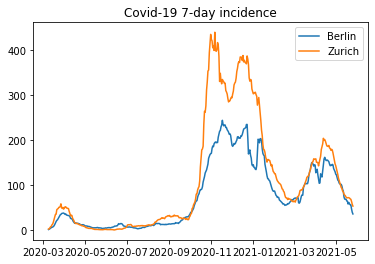

In [55]:
plt.plot(cases_be.date,cases_be.incidence, label = 'Berlin');
plt.plot(cases_zh.date,cases_zh.incidence, label = 'Zurich');
plt.legend();
plt.title('Covid-19 7-day incidence');